### 라이브러리 불러오기

In [1]:
import pandas as pd
import os

### 파일 불러오기

In [2]:
protocol_file   = '/home/woongjae/noise-tracing/wj_model/protocol/protocol_eval.txt'
predictions_file = '/home/woongjae/noise-tracing/wj_model/results/eval_cnn+lstm_2_result.txt'

In [3]:
# file_path, subset, label (tab 구분)
protocol = pd.read_csv(
    protocol_file,
    sep='\t',
    header=None,
    names=['file_path', 'subset', 'label']
)
print(f"📦 총 샘플 수: {len(protocol)}")

📦 총 샘플 수: 101001


In [4]:
# file_path, predicted_label
preds = pd.read_csv(
    predictions_file,
    sep=' ',
    header=None,
    names=['file_path', 'predicted_label']
)
print(f"📦 총 샘플 수: {len(preds)}")

📦 총 샘플 수: 101001


In [5]:
# 3) file_path 기준으로 병합
df = protocol[['file_path', 'label']].merge(preds, on='file_path', how='inner')
print(f"📦 총 샘플 수: {len(df)}")
# 4) 정확도 계산
accuracy = (df['label'] == df['predicted_label']).mean() * 100

📦 총 샘플 수: 101001


In [6]:
print("📌 protocol 고유 파일 수:", protocol["file_path"].nunique())
print("📌 preds 고유 파일 수:", preds["file_path"].nunique())

print("🔁 protocol 중복된 file_path 개수:", protocol["file_path"].duplicated().sum())
print("🔁 preds 중복된 file_path 개수:", preds["file_path"].duplicated().sum())

📌 protocol 고유 파일 수: 101001
📌 preds 고유 파일 수: 101001
🔁 protocol 중복된 file_path 개수: 0
🔁 preds 중복된 file_path 개수: 0


In [7]:
print("📌 protocol 고유 파일 수:", df["file_path"].nunique())
df.head()

📌 protocol 고유 파일 수: 101001


,file_path,label,predicted_label
0,/home/woongjae/noise-tracing/new_dataset/Datas...,clean,clean
1,/home/woongjae/noise-tracing/new_dataset/Datas...,clean,clean
2,/home/woongjae/noise-tracing/new_dataset/Datas...,clean,clean
3,/home/woongjae/noise-tracing/new_dataset/Datas...,clean,clean
4,/home/woongjae/noise-tracing/new_dataset/Datas...,clean,clean


In [8]:
print(f'Overall Accuracy: {accuracy:.2f}%\n')

Overall Accuracy: 80.02%



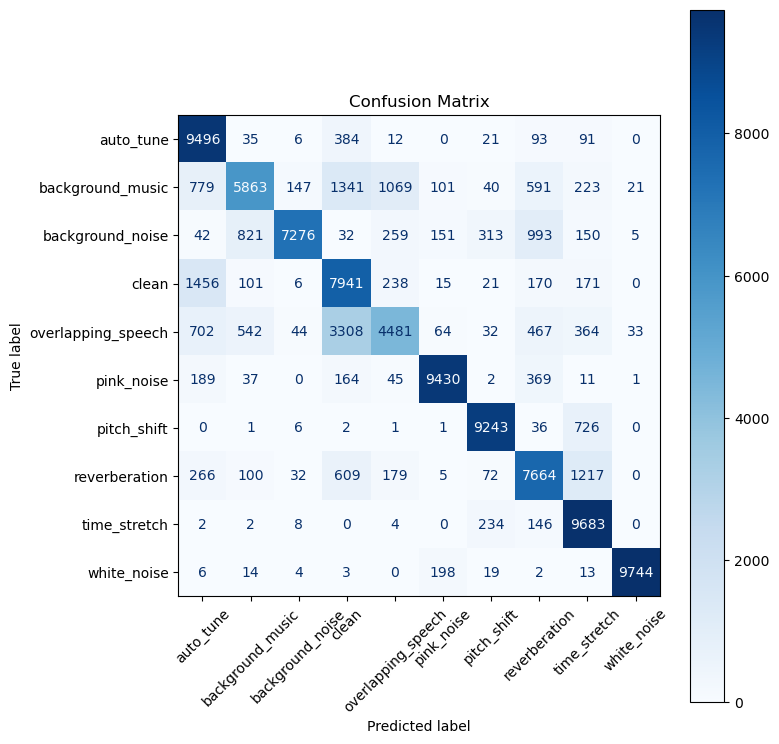

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = df['label']
y_pred = df['predicted_label']

# 4. 라벨 목록 (모델에 사용된 순서대로)
labels = sorted(y_true.unique())

# 5. Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# 1. meta_sub.csv 파일에서 파일 경로 추출
meta_path = "/home/woongjae/noise-tracing/new_dataset/Dataset/metafile/meta_sub.csv"
meta_df = pd.read_csv(meta_path)
meta_files = set(meta_df['File_path'].tolist())

# 2. protocol 파일에서 파일 경로 추출 (탭 구분)
protocol_paths = []
for proto in [
    "/home/woongjae/noise-tracing/wj_model/protocol/protocol_train_dev.txt",
    "/home/woongjae/noise-tracing/wj_model/protocol/protocol_eval.txt"
]:
    with open(proto, encoding='utf-8') as f:
        for line in f:
            path = line.strip().split('\t')[0]
            protocol_paths.append(path)

protocol_set = set(protocol_paths)

# 3. 누락된 파일 찾기
missing_files = sorted(list(protocol_set - meta_files))

# 4. 누락된 파일 저장(선택)
with open("missing_files.txt", "w", encoding='utf-8') as f:
    for file in missing_files:
        f.write(file + '\n')

print(f"누락 파일 개수: {len(missing_files)}")
if missing_files:
    print("예시:", missing_files[:3])
else:
    print("누락된 파일 없음")


/home/woongjae/miniconda3/envs/asvspoof5/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3550: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


누락 파일 개수: 0
누락된 파일 없음
